In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip3 install tensorflow

import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.utils import load_img

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
input_size = 150
size_inner = 64

In [48]:
base_model = keras.models.Sequential()
inputs = keras.Input(shape=(input_size, input_size, 3))
base = base_model(inputs)
##############################################

vectors = keras.layers.Conv2D(
    filters=32,
    kernel_size=(3,3),
    activation="relu",)(base)

maxpool = keras.layers.MaxPool2D(pool_size=(2,2))(vectors)

flattened = tf.keras.layers.Flatten()(maxpool)

inner = keras.layers.Dense(64, activation='relu')(flattened)
outputs = keras.layers.Dense(1, activation='sigmoid')(inner)
model = keras.Model(inputs, outputs)

##############################################

optimizer = keras.optimizers.SGD(lr=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy(from_logits=False)
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy'])


In [49]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential_4 (Sequential)   multiple                  0         
                                                                 
 conv2d_14 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 175232)            0         
                                                                 
 dense_10 (Dense)            (None, 64)                11214912  
                                                           

In [50]:
train_gen = ImageDataGenerator(
    rescale=1./255
  )
train_ds = train_gen.flow_from_directory(
  '/content/gdrive/MyDrive/Colab Notebooks/MLzoomcamp/data/train',
    target_size=(input_size, input_size),
    batch_size=20,
    shuffle=True,
    class_mode='binary',
    )
val_gen = ImageDataGenerator(
    rescale=1./255
  )
val_ds = val_gen.flow_from_directory(
    '/content/gdrive/MyDrive/Colab Notebooks/MLzoomcamp/data/test',
    target_size=(input_size, input_size),
    batch_size=20,
    shuffle=False,
    class_mode='binary',
    )


Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [51]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    workers=2560,
)

Epoch 1/10
184/184 [==============================] - 30s 142ms/step - loss: 0.6696 - accuracy: 0.6108 - val_loss: 0.6321 - val_accuracy: 0.6340
Epoch 2/10
184/184 [==============================] - 27s 141ms/step - loss: 0.5886 - accuracy: 0.6957 - val_loss: 0.5758 - val_accuracy: 0.7081
Epoch 3/10
184/184 [==============================] - 26s 127ms/step - loss: 0.5345 - accuracy: 0.7348 - val_loss: 0.5641 - val_accuracy: 0.7124
Epoch 4/10
184/184 [==============================] - 24s 126ms/step - loss: 0.4969 - accuracy: 0.7667 - val_loss: 0.5522 - val_accuracy: 0.7386
Epoch 5/10
184/184 [==============================] - 27s 135ms/step - loss: 0.4476 - accuracy: 0.7982 - val_loss: 0.5677 - val_accuracy: 0.7059
Epoch 6/10
184/184 [==============================] - 26s 125ms/step - loss: 0.3888 - accuracy: 0.8371 - val_loss: 0.5392 - val_accuracy: 0.7636
Epoch 7/10
184/184 [==============================] - 28s 140ms/step - loss: 0.2796 - accuracy: 0.8958 - val_loss: 0.5598 - val_ac

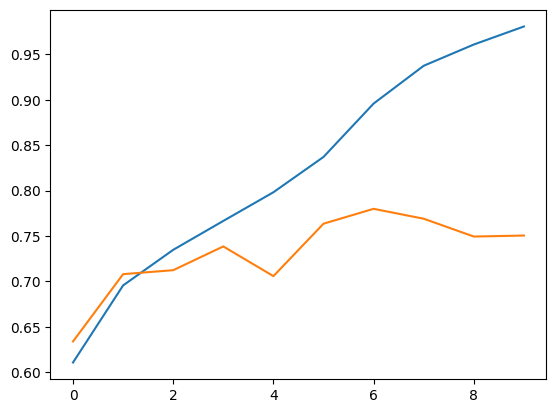

In [52]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='train')

In [53]:
np.median(history.history['accuracy'])

0.8176502585411072

In [54]:
np.std(history.history['loss'])

0.19399512420646922

In [55]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
  )
train_ds = train_gen.flow_from_directory(
  '/content/gdrive/MyDrive/Colab Notebooks/MLzoomcamp/data/train',
    target_size=(input_size, input_size),
    batch_size=20,
    shuffle=True,
    class_mode='binary',
    )

Found 3677 images belonging to 2 classes.


In [56]:
history_augmented = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    workers=2560,
)

Epoch 1/10
184/184 [==============================] - 59s 303ms/step - loss: 0.5409 - accuracy: 0.7528 - val_loss: 0.5081 - val_accuracy: 0.7952
Epoch 2/10
184/184 [==============================] - 55s 265ms/step - loss: 0.5030 - accuracy: 0.7721 - val_loss: 0.5002 - val_accuracy: 0.7865
Epoch 3/10
184/184 [==============================] - 58s 300ms/step - loss: 0.4925 - accuracy: 0.7789 - val_loss: 0.4768 - val_accuracy: 0.7821
Epoch 4/10
184/184 [==============================] - 51s 257ms/step - loss: 0.4845 - accuracy: 0.7805 - val_loss: 0.4966 - val_accuracy: 0.7778
Epoch 5/10
184/184 [==============================] - 46s 229ms/step - loss: 0.4853 - accuracy: 0.7694 - val_loss: 0.4753 - val_accuracy: 0.7832
Epoch 6/10
184/184 [==============================] - 53s 271ms/step - loss: 0.4746 - accuracy: 0.7813 - val_loss: 0.4913 - val_accuracy: 0.7865
Epoch 7/10
184/184 [==============================] - 51s 252ms/step - loss: 0.4695 - accuracy: 0.7887 - val_loss: 0.4868 - val_ac

In [59]:
np.mean(history_augmented.history['val_loss'])

0.49159264862537383

In [60]:
np.mean(history_augmented.history['val_accuracy'][5:])

0.7793028235435486